# 数据探索

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime
import time

## 载入数据

In [4]:
df = pd.read_excel('test_data.xls')

In [5]:
# 观察第一笔订单
df.ix[0]

ship_name                                                            姐客戶
ship_mobile                                                  16143836292
order_id                                                 170102235550041
total_amount                                                          34
final_amount                                                          34
pay_status                                                             1
ship_status                                                            1
is_delivery                                                            Y
try_order                                                          False
erp_order_id                                                           1
erp_status                                                          succ
createtime                                                    1483372544
last_modified                                                 1483855998
payment                                            

## 浏览所有字段

### ship_name 客户姓名

In [12]:
df.ship_name.map(lambda n: n[:1]).value_counts().head()

姐    453
生    160
士    144
敏     99
红     74
Name: ship_name, dtype: int64

- ship_name 可能是顾客名字的第三个字，前两个为X小姐、Y先生
- ship_name 与 ship_mobile 信息重复，可忽略

### total_amount，df.final_amount 订单金额

In [13]:
(df.total_amount == df.final_amount).all()

True

- total_amount 与 final_amount 信息重复，可忽略其中一个

### pay_status 付款情形

In [14]:
df.pay_status.value_counts()

1    4956
0     779
5     111
4      35
Name: pay_status, dtype: int64

- 有四种付款情形，大部分为方式1

### ship_status 出货状态

In [15]:
df.ship_status.value_counts()

1    4803
0    1078
Name: ship_status, dtype: int64

- 有两种出货状态，大部分为1
- 0 是自取吗？

### is_delivery 是否出货

In [16]:
df.is_delivery.value_counts()

Y    5881
Name: is_delivery, dtype: int64

- 全部订单应为有效订单
- 分析可忽略此字段

### try_order 试单

In [17]:
df.try_order.value_counts()

False    5881
Name: try_order, dtype: int64

- 全部都不是试单
- 分析可忽略此字段

### erp_order_id ERP订单类型

In [20]:
df.erp_order_id.value_counts()

1    5316
0     565
Name: erp_order_id, dtype: int64

### erp_status ERP状态

In [21]:
df.erp_status.value_counts()

succ      5068
normal     813
Name: erp_status, dtype: int64

### createtimes 订单建立时间

In [22]:
createtimes = df.createtime.map(datetime.fromtimestamp)
createtimes.min(), createtimes.max()

(Timestamp('2017-01-01 06:51:11'), Timestamp('2017-03-21 19:25:09'))

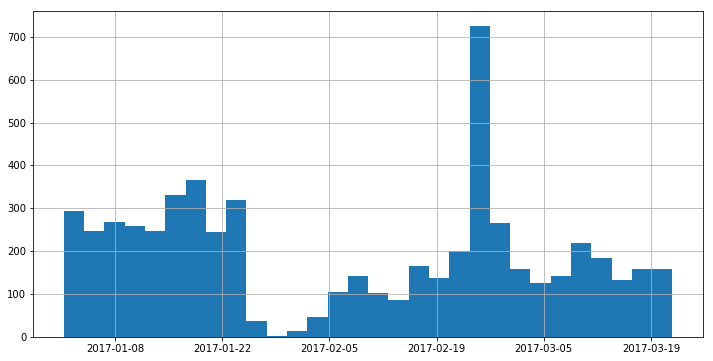

In [23]:
createtimes.hist(bins=30, figsize=(12,6))

- 最旧的订单：'2017-01-01 06:51:11'
- 最新的订单：'2017-03-21 19:25:09'
- 春节期间（1/27~2/2）几乎没有订单
- 2/25 附近有一波订单，促销活动吗？

### modifytimes 订单修改时间

In [24]:
modifytimes = df.last_modified.map(datetime.fromtimestamp)
modifytimes.min(), modifytimes.max()

(Timestamp('2017-01-01 12:39:04'), Timestamp('2017-03-21 19:35:30'))

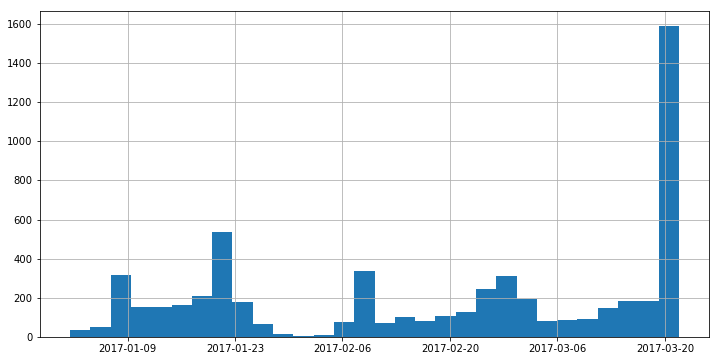

In [25]:
modifytimes.hist(bins=30, figsize=(12,6))

- 最旧的改单：'2017-01-01 12:39:04'
- 最新的改单：'2017-03-21 19:35:30'
- 3/20 突然发生大量改单，发生什么事情？

### payment 支付方式

In [27]:
df.payment.value_counts()

wxpayjsapi    3256
online         835
alipay         639
wxsmpay        564
-1             515
deposit         72
Name: payment, dtype: int64

- 大部分为微信支付
- “-1” 是什么情形？

### shipping_id 运送单位？

In [29]:
df.shipping_id.value_counts()

1    5881
Name: shipping_id, dtype: int64

- 全部同一个值
- 猜测目前是自行配送
- 分析可忽略此字段

### shipping 运送方式

In [30]:
df.shipping.value_counts()

冷链直供      4905
一米市集直送     976
Name: shipping, dtype: int64

- 冷链的条件：肉品？高单价？客户付费？

### member_id 会员ID

In [33]:
# 判断 ship_mobile 与 member_id 是否一对一关系
members = df[['ship_mobile','member_id']].drop_duplicates()
members.ship_mobile.duplicated().any()

True

In [34]:
members.groupby('ship_mobile').member_id.count().sort_values()[-5:]

ship_mobile
16143651264    3
17015710353    3
16165837240    3
16165985610    3
17112128686    4
Name: member_id, dtype: int64

In [35]:
members.groupby('member_id').ship_mobile.count().sort_values()[-5:]

member_id
107911    2
88384     2
86235     2
90928     2
100459    3
Name: ship_mobile, dtype: int64

- 有一支手机门号注册多个会员的情形：新会员有优惠？注册系统允许？
- 有一个会员使用多个手机门号的情形：代订？送礼？

### promotion_type 促销类型

In [36]:
df.promotion_type.value_counts()

normal     5114
group       703
prepare      42
card         22
Name: promotion_type, dtype: int64

分为：正常、团购、预购、礼物卡（猜测）

In [ ]:
# 分组
groups = df.group_id.value_counts()
len(groups)

In [ ]:
groups.head(10)

In [ ]:
len(df[df.group_id != 0])

In [ ]:
# groupid 不为 0 的五笔订单
other_groups = df[df.group_id != 0]
other_groups.head()

In [ ]:
other_groups.total_amount.value_counts()

- 不清楚怎么划分 group 的
- and，找到两个神秘的消费金额 109 跟 0.01

In [ ]:
# groupon 团购 (?)
df.groupOn_id.value_counts()

In [ ]:
df[df.groupOn_id == 44930407].head()

In [ ]:
df[df.groupOn_id == 71845949].head()

- 109 跟 0.01 应该是两种团购的价格

In [ ]:
# 是否为带路货
df.is_leader.value_counts()

In [ ]:
df.groupby(['is_leader', 'groupOn_id']).order_id.count().unstack().fillna(0)

- 团购 vs. 带路货 没有绝对关系

In [ ]:
# is_prepare
df.is_prepare.value_counts()

- 不管这是什么，全部都同一个值
- 分析时先滤掉

In [ ]:
# group_num
df.group_num.value_counts()

In [ ]:
# 订单状态(?)
df.status.value_counts()

In [ ]:
# 确认投递
df.confirm_delivery.value_counts()

In [ ]:
# confirm
df.confirm.value_counts()

- 额... 都没有 confirm

In [ ]:
# ship_area
df.ship_area.value_counts()

- 运送地点有中文、英文
- 可以抽取 area code

In [ ]:
# 改写 ship_area
df.ship_area = df.ship_area.map(lambda area: area.split(':')[-1])
df.ship_area.value_counts()

In [ ]:
# weight
df.weight.describe()

- 平均 1233.710593 （公克吗？）
- 最轻 0 （空气？）
- 最重 16377

In [ ]:
df.weight.hist(bins=20)

In [ ]:
# tostr
df.tostr.value_counts()

In [ ]:
# itemnum
df.itemnum.describe()

In [ ]:
df.itemnum.hist(bins=20)

In [ ]:
# cost_payment
df.cost_payment.value_counts()

- 都是 0
- 分析可以滤掉

In [ ]:
# currency
df.currency.value_counts()

- 目前业务还在中国境内
- 分析可以滤掉

In [ ]:
# cur_rate
df.cur_rate.value_counts()

- 目前业务还在中国境内
- 分析可以滤掉

In [ ]:
# advance
df.advance.value_counts().head()

In [ ]:
# score_u
df.score_u.value_counts().head()

In [ ]:
# score_g
df.score_g.value_counts().head()

In [ ]:
# discount
df.discount.value_counts().head()

In [ ]:
# pmt_goods
df.pmt_goods.value_counts().head()

In [ ]:
# pmt_order
df.pmt_order.value_counts().head()

In [ ]:
# payed
df.payed.describe()

In [ ]:
# 订单金额减折扣 ！= 付款金额
((df.total_amount + df.discount) != (df.payed)).any()

In [ ]:
dfx = df[(df.total_amount + df.discount) != (df.payed)]
dfx.payed.value_counts().head()

一堆没付款的？！

In [ ]:
df[df.payed == 0].payment.value_counts()

In [ ]:
# disabled
df.disabled.value_counts()

- 意义不明

In [ ]:
# displayonsite
df.displayonsite.value_counts()

In [ ]:
# mark_type
df.mark_type.value_counts()

In [ ]:
# cost_freight (运费)
df.cost_freight.value_counts()

In [ ]:
# extend
df.extend.value_counts()

In [ ]:
# order_refer
df.order_refer.value_counts()

In [ ]:
# addon
df.addon.value_counts().head()

- 额外加入的信息
- 将来如要分析，需要再清理

In [ ]:
# source
df.source.value_counts()

订单来源
- 微信 （手机app?)
- iso
- pc
- wap （手机版网页）

In [ ]:
# city_link
df.city_link.value_counts()

In [ ]:
# verify_city_link
df.verify_city_link.value_counts()

In [ ]:
# fuzzy
df.fuzzy.value_counts()

In [ ]:
# longitude, latitude
plt.scatter(df.longitude, df.latitude)

In [ ]:
# 出现奇异点
df.latitude.describe()

In [ ]:
df.longitude.describe()

In [ ]:
dfx = df[(df.latitude < 32) & (df.longitude > 120)]
plt.scatter(dfx.latitude, dfx.longitude)

In [ ]:
# scalping (剥光?)
df.scalping.value_counts()

In [ ]:
# out_trade_no (交易流水号？)
df.out_trade_no.value_counts().head()

In [ ]:
# autoSendErp
df.autoSendErp.value_counts()

In [ ]:
# string_tag_id
df.string_tag_id.value_counts().head()

In [ ]:
# lang
df.lang.value_counts()

In [ ]:
# delivery_note_price
df.delivery_note_price.value_counts()